# Student Score Prediction

Author: Andersen Chandra

Data Source: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

## Objective:
This project aims to develop a predictive model for students' score/GPA using Linear Regression. This model will be trained on relevant independent variables while excluding the GradeClass and GPA columns to prevent data leakage, as GradeClass is highly correlated with GPA. The goal is to analyze how different factors influence students' academic performance and build a reliable regression model to predict GPA based on these factors.

## Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Student_performance_data _.csv')

In [4]:
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


# Data Preprocessing

In [6]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
df = pd.get_dummies(df, columns=['Ethnicity'])

In [9]:
df.head(10)

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,1001,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,True,False,False,False
1,1002,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,True,False,False,False
2,1003,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,False,False,True,False
3,1004,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,True,False,False,False
4,1005,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,True,False,False,False
5,1006,18,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0,True,False,False,False
6,1007,15,0,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0,False,True,False,False
7,1008,15,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0,False,True,False,False
8,1009,17,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0,True,False,False,False
9,1010,16,1,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0,True,False,False,False


In [10]:
df = df.rename(columns={'Ethnicity_0': 'Caucasian', 'Ethnicity_1': 'African_American', 'Ethnicity_2' : 'Asian', 'Ethnicity_3': 'Other'})

In [11]:
df.head()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Caucasian,African_American,Asian,Other
0,1001,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,True,False,False,False
1,1002,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,True,False,False,False
2,1003,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,False,False,True,False
3,1004,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,True,False,False,False
4,1005,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,True,False,False,False


In [12]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   StudentID       Age    Gender  ParentalEducation  \
StudentID           1.000000 -0.042255 -0.014625          -0.002307   
Age                -0.042255  1.000000  0.044895           0.025099   
Gender             -0.014625  0.044895  1.000000           0.006771   
ParentalEducation  -0.002307  0.025099  0.006771           1.000000   
StudyTimeWeekly     0.026976 -0.006800  0.011469          -0.011051   
Absences            0.014841 -0.011511  0.021479           0.036518   
Tutoring           -0.007834 -0.012076 -0.031597          -0.017340   
ParentalSupport     0.003016  0.033197  0.008065          -0.017463   
Extracurricular    -0.003611 -0.025061 -0.005964           0.007479   
Sports             -0.020703 -0.046320 -0.008897           0.002029   
Music              -0.005468 -0.003492  0.007109           0.039439   
Volunteering        0.008011  0.013074 -0.000200           0.011960   
GPA                -0.002697  0.000275 -0.013360          -0.035854   
GradeC

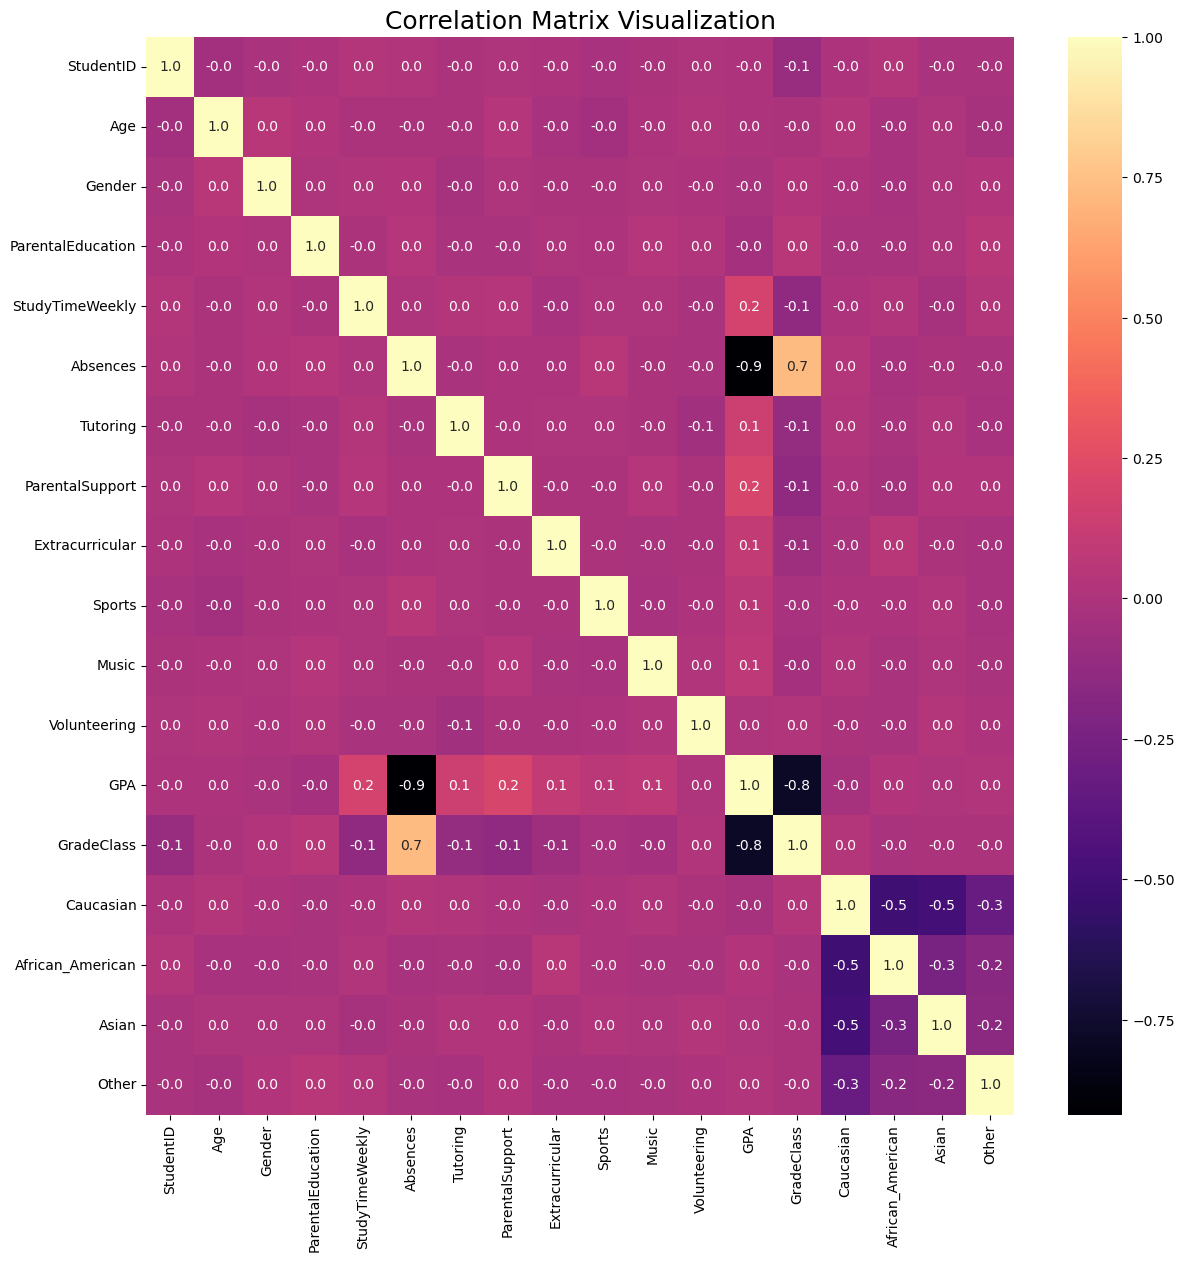

In [13]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.1f')
plt.title("Correlation Matrix Visualization", fontsize=18)
plt.show()

In [14]:
data_without_gradeclass = df.drop(columns=['GradeClass'])
correlation = data_without_gradeclass.corr(method='pearson')
data_corr = correlation['GPA'].sort_values(ascending=False)
print(data_corr)

GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
African_American     0.022415
Other                0.014511
Asian                0.008614
Volunteering         0.003258
Age                  0.000275
StudentID           -0.002697
Gender              -0.013360
Caucasian           -0.033402
ParentalEducation   -0.035854
Absences            -0.919314
Name: GPA, dtype: float64


## Model Training and Evaluation

In [15]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['GPA', 'GradeClass'], axis=1)
y = df['GPA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_reg.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("R^2 Score: ", r2_score(y_pred, y_test))

Mean Squared Error:  0.03901121121334942
R^2 Score:  0.9493417094798442


In [18]:
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

r2_train_score = r2_score(y_train_pred, y_train)
r2_test_score = r2_score(y_test_pred, y_test)

mse_train_score = mean_squared_error(y_train, y_train_pred)
mse_test_score = mean_squared_error(y_test, y_test_pred)

print("Training Set r2 score: ", r2_train_score)
print("Testing Set r2 score: ", r2_test_score)
print("Training Set MSE score: ", mse_train_score)
print("Testing Set MSE score: ", mse_test_score)

Training Set r2 score:  0.9521598793434116
Testing Set r2 score:  0.9493417094798442
Training Set MSE score:  0.03833239011912433
Testing Set MSE score:  0.03901121121334942


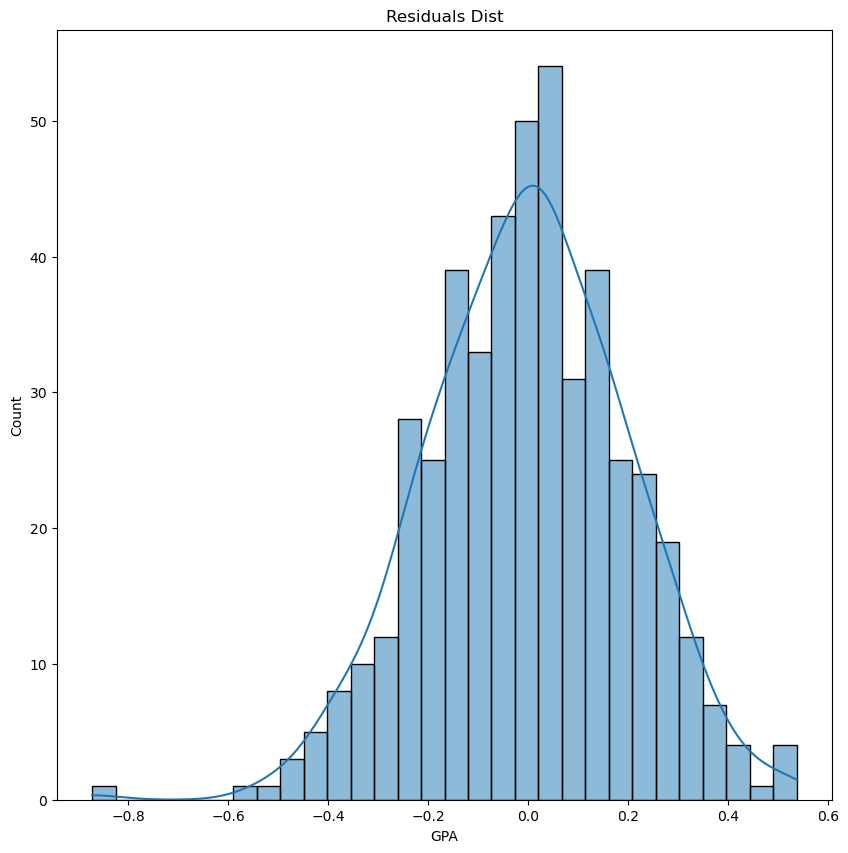

In [22]:
residual = y_test - linear_reg.predict(X_test)
plt.figure(figsize=(10, 10))
sns.histplot(residual, bins=30, kde=True)
plt.title("Residuals Dist")
plt.show()

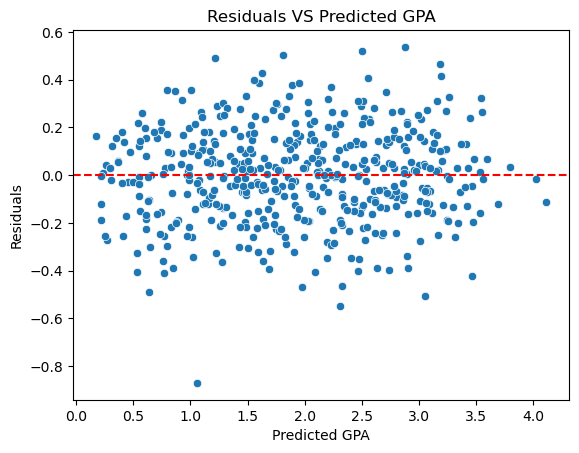

In [23]:
sns.scatterplot(x=y_pred, y=residual)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted GPA")
plt.ylabel("Residuals")
plt.title("Residuals VS Predicted GPA")
plt.show()

## Saving Model

In [25]:
import joblib

joblib.dump(linear_reg, "linear-regression-model.pkl")

['linear-regression-model.pkl']

# Conclusion

This project successfully develop a predictive model to predict students' GPA using Linear Regression. The workflow begins with data preprocessing, where we check for missing values, duplicate rows in the dataset and apply one-hot encoding to the ethnicity column to prevent the model from assuming any inherent order. We also analyze and visualize feature correlations using a heatmap, ensuring that GradeClass column is excluded from correlation mapping to prevent data leakage, as it is derived from GPA. 

Next, we split the dataset into training and testing set and train the Linear Regression model. The model performance is evaluated using RSE and R^2 Score, achieving MSE score of 0.03 and R^2 score of 0.94, indicating strong predictive accuracy. the MSE and R^2 score between the training and the testing set is also similar, showing that the model perform well when being trained and tested. 

Residual analysis shows that errors are normally distributed and centered around zero, with no clear pattern in the residual vs. predicted GPA scatterplot, suggesting that the model makes unbiased predictions. Finally, we save the model with joblib for the future use.